## Test Code

In [1]:
library(XML)
ubase = "http://www.cherryblossom.org/"

#### From text
menURLs = 
  c("cb99m.htm", 
    "cb003m.htm", 
    "results/2001/oof_m.html",
    "results/2002/oofm.htm", 
    "results/2003/CB03-M.HTM",
    "results/2004/men.htm", 
    "results/2005/CB05-M.htm", 
    "results/2006/men.htm", 
    "results/2007/men.htm", 
    "results/2008/men.htm", 
    "results/2009/09cucb-M.htm",
    "results/2010/2010cucb10m-m.htm", 
    "results/2011/2011cucb10m-m.htm",
    "results/2012/2012cucb10m-m.htm")
####

#### Text URLS
urls = paste(ubase, menURLs, sep="")
urls[1:4]

# 1999: http://www.cherryblossom.org/cb99m.htm
# 2000: http://www.cherryblossom.org/cb003m.htm
# 2001: http://www.cherryblossom.org/results/2001/oof_m.html

#### Textbook Function
extractResTable =
  #
  # Retrieve data from web site, 
  # find the preformatted text,
  # and write lines or return as a character vector.
  #
  function(url = "http://www.cherryblossom.org/results/2009/09cucb-F.htm",
           year = 1999, sex = "male", file = NULL)
  {
    #added encoding for windows users who get an "A" symbol
    doc = htmlParse(url)    
    #doc = htmlParse(url, encoding="UTF-8")
    
    if (year == 2000) {
      # Get preformatted text from 4th font element
      # The top file is ill formed so the <pre> search doesn't work.
      ff = getNodeSet(doc, "//font")
      txt = xmlValue(ff[[4]])
      els = strsplit(txt, "\r\n")[[1]]
    }
    else if (year == 2009 & sex == "male") {
      # Get preformatted text from <div class="Section1"> element
      # Each line of results is in a <pre> element
      div1 = getNodeSet(doc, "//div[@class='Section1']")
      pres = getNodeSet(div1[[1]], "//pre")
      els = sapply(pres, xmlValue)
    }
    else {
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\r\n")[[1]]
#      els2 = strsplit(txt, "\n")[[1]]
    } 
    
    if (is.null(file)) return(els)
    # Write the lines as a text file.
    writeLines(els, con = file)
  }

# Skip over the first pass
#### Individual Input Components for Testing: 1999
url <- 'http://www.cherryblossom.org/results/1999/cb99m.html'
year <- 1999
sex <- "male"
file <- NULL
####

# Skip over the first pass
#### Individual Input Components for Testing: 2000
url <- 'http://www.cherryblossom.org/results/2000/Cb003m.htm'
year <- 2000
sex <- "male"
file <- NULL
####

#### Textbook example with (1) URL
df1 <- extractResTable(url = "http://www.cherryblossom.org/results/2000/Cb003m.htm", year = 2000, sex = "male", file = NULL)
df2 <- extractResTable(url = "http://www.cherryblossom.org/results/1999/cb99m.html", year = 1999, sex = "male", file = NULL)
#df3 <- extractResTableV2(url = "http://www.cherryblossom.org/results/1999/cb99m.html", year = 1999, sex = "male", file = NULL)

#### Textbook extraction of Male tables (results in an error)
years = 1999:2012
menTables = mapply(extractResTable, url = urls, year = years)
#names(menTables) = years # can't run b/c menTables hasn't been created
#sapply(menTables, length) # can't run b/c menTables hasn't been created

menTables <- list()
for(i in 1:length(years)){
  menTables[[i]] <- try(extractResTable(url=urls[i], year=years[i]))
}

# Let's go check out the first two URLs
urls[1] # [1] "http://www.cherryblossom.org/cb99m.htm"
urls[2] # [1] "http://www.cherryblossom.org/cb003m.htm"

#### Revised URLS
menURLsV2 = 
  c("results/1999/cb99m.html", #"cb99m.htm"
    "results/2000/Cb003m.htm", #"cb003m.htm"
    "results/2001/oof_m.html", #"results/2001/oof_m.html"
    "results/2002/oofm.htm", #"results/2002/oofm.htm"
    "results/2003/CB03-M.HTM", #"results/2003/CB03-M.HTM"
    "results/2004/men.htm", #"results/2004/men.htm"
    "results/2005/CB05-M.htm", #"results/2005/CB05-M.htm"
    "results/2006/men.htm", #"results/2006/men.htm"
    "results/2007/men.htm", #"results/2007/men.htm"
    "results/2008/men.htm", #"results/2008/men.htm"
    "results/2009/09cucb-M.htm", #"results/2009/09cucb-M.htm"
    "results/2010/2010cucb10m-m.htm", #"results/2010/2010cucb10m-m.htm"
    "results/2011/2011cucb10m-m.htm", #"results/2011/2011cucb10m-m.htm"
    "results/2012/2012cucb10m-m.htm" #"results/2012/2012cucb10m-m.htm"
  )
####

#### Revised URLS
urlsV2 = paste(ubase, menURLsV2, sep="")
urlsV2[1:4]

#### Modified textbook extraction of Male tables (results in 1999 having (1) record)
menTables = mapply(extractResTable, url = urlsV2, year = years)
names(menTables) = years
sapply(menTables, length)

#### Code to compare and contrast the format of two different years
substr(menTables$'1999', start = 1, stop = 100)
substr(menTables$'2000', start = 1, stop = 100)
menTables$'2000'[1:10]

#### Revised Function
extractResTableV2 =
  #
  # Retrieve data from web site, 
  # find the preformatted text,
  # and write lines or return as a character vector.
  #
  function(url = "http://www.cherryblossom.org/results/2009/09cucb-F.htm",
           year = 1999, sex = "male", file = NULL)
  {
    #added encoding for windows users who get an "A" symbol
    doc = htmlParse(url, encoding="UTF-8")
    
    if (year == 2000) {
      # Get preformatted text from 4th font element
      # The top file is ill formed so the <pre> search doesn't work.
      ff = getNodeSet(doc, "//font")
      txt = xmlValue(ff[[4]])
      els = strsplit(txt, "\r\n")[[1]]
    }
    else if (year == 2009 & sex == "male") {
      # Get preformatted text from <div class="Section1"> element
      # Each line of results is in a <pre> element
      div1 = getNodeSet(doc, "//div[@class='Section1']")
      pres = getNodeSet(div1[[1]], "//pre")
      els = sapply(pres, xmlValue)
    }
    else if (year == 1999 & sex == "male") { # have to add this else if statement
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\n")[[1]]   
    } 
    else {
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\r\n")[[1]]   
    } 
    
    if (is.null(file)) return(els)
    # Write the lines as a text file.
    writeLines(els, con = file)
  }

#### Corrected function to pull down Male tables with consistent format
menTablesV2 = mapply(extractResTableV2, url = urlsV2, year = years)
names(menTablesV2) = years
sapply(menTablesV2, length)

#### Confirmation that the 1999 and other years have consistent formatting
menTablesV2$'1999'[1:10]
menTablesV2[[2]][1:10]

#### Save the outputs
save(menTablesV2, file = "CBMenTextTables.rda")

#### Now we need to investigate the differences between the male and female result pages
# 2000
df_male_2000 <- extractResTableV2(url = "http://www.cherryblossom.org/results/2000/Cb003m.htm", year = 2000, sex = "male", file = NULL)
df_female_2000 <- extractResTableV2(url = "http://www.cherryblossom.org/results/2000/Cb003f.htm", year = 2000, sex = "female", file = NULL)

df_female_2000[1:10]
df_male_2000[1:10]

# 2006
df_male_2006 <- extractResTableV2(url = "http://www.cherryblossom.org/results/2006/men.htm", year = 2006, sex = "male", file = NULL)
df_female_2006 <- extractResTableV2(url = "http://www.cherryblossom.org/results/2006/women.htm", year = 2006, sex = "female", file = NULL)

df_female_2006[1:10]
df_male_2006[1:10]

######################################################################
# Miscellaneous Code

menTables <- list()
for(i in 1:length(years)){
  menTables[[i]] <- try(extractResTable(url=urlsV2[i], year=years[i]))
}

# Breaking down the extractResTableV2 for 1999 - Men
url <- urlsV2[1]
doc = htmlParse(url, encoding="UTF-8")
pres = getNodeSet(doc, "//pre")
txt = xmlValue(pres[[1]])
els = strsplit(txt, "\r\n")[[1]]
els = strsplit(txt, "\n")[[1]]

# Breaking down the extractResTableV2 for 2009 - Men
url <- urlsV2[11]
doc = htmlParse(url, encoding="UTF-8")
div1 = getNodeSet(doc, "//div[@class='Section1']")
pres = getNodeSet(div1[[1]], "//pre")
els = sapply(pres, xmlValue)



SyntaxError: invalid syntax (<ipython-input-1-efac8e6f4b08>, line 5)

In [2]:
ubase = "http://www.cherryblossom.org/"
menURLs = ["cb99m.htm", 
    "cb003m.htm", 
    "results/2001/oof_m.html",
    "results/2002/oofm.htm", 
    "results/2003/CB03-M.HTM",
    "results/2004/men.htm", 
    "results/2005/CB05-M.htm", 
    "results/2006/men.htm", 
    "results/2007/men.htm", 
    "results/2008/men.htm", 
    "results/2009/09cucb-M.htm",
    "results/2010/2010cucb10m-m.htm", 
    "results/2011/2011cucb10m-m.htm",
    "results/2012/2012cucb10m-m.htm"]
m_urls = [ubase + s for s in menURLs]
m_urls[1:4]

['http://www.cherryblossom.org/cb003m.htm',
 'http://www.cherryblossom.org/results/2001/oof_m.html',
 'http://www.cherryblossom.org/results/2002/oofm.htm']

In [4]:
import urllib.request
from bs4 import BeautifulSoup

URL = 'http://www.cherryblossom.org/results/2006/women.htm'

response = urllib.request.urlopen(URL)
html = response.read().decode('utf-8')
soup = BeautifulSoup(html, "lxml")
#text = soup.get_text()
table = soup.find('pre').find(text=True)
raw_rows = [x.strip() for x in table.split('\n')]
#table_cols = raw_rows[6].split()
#table_cols[1] = table_cols[1] + table_cols[2]
#table_cols.remove("/TOT")
raw_rows[:10]

['',
 'Credit Union Cherry Blossom 10 Mile Road Race',
 'Washington, DC',
 'Sunday, April 2, 2006',
 "Women's Official Results Sorted By Gun Time",
 '',
 'Place Div/Tot  Num    Name                   Ag Hometown        Net Tim Gun Tim  Pace  S',
 '===== ======== ====== ====================== == ======================= =======  ===== =',
 '1   1/4069      4 Lidiya Grigoryeva      32 Russia            52:11   52:11#  5:14 !',
 '2   2/4069      6 Alevtina Ivanova       30 Russia            52:39   52:39#  5:16 !']

In [5]:
table_cols = raw_rows[6].split()
table_cols

['Place',
 'Div/Tot',
 'Num',
 'Name',
 'Ag',
 'Hometown',
 'Net',
 'Tim',
 'Gun',
 'Tim',
 'Pace',
 'S']

In [6]:
table_cols = raw_rows[6].split()
table_cols[6] = table_cols[6] + ' ' + table_cols[7]
table_cols[8] = table_cols[8] + ' ' + table_cols[9]
table_cols.remove("Tim")
table_cols.remove("Tim")
table_cols

['Place',
 'Div/Tot',
 'Num',
 'Name',
 'Ag',
 'Hometown',
 'Net Tim',
 'Gun Tim',
 'Pace',
 'S']

In [7]:
#table_cols = raw_rows[10]
#table_cols = list(table_cols.split())
table_cols = raw_rows[6].split()
table_cols[1] = table_cols[1] + table_cols[2]
#table_cols[7] = table_cols[7] + ' ' + table_cols[8]
#table_cols[9] = table_cols[9] + ' ' + table_cols[10]
table_cols.remove("/Tot")
#table_cols.remove("Tim")
#table_cols.remove("Tim")
table_cols

ValueError: list.remove(x): x not in list

In [11]:
import re
parsed_rows = []
for row in raw_rows[6:len(raw_rows[6:])+1]:
    parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    if len(re.split(r'\s{2,}|(?<=[0-9])\s', row)) > 10:
        print(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    #parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
#parsed_rows[2160:]

In [12]:
len(parsed_rows)

5434

In [13]:
import pandas as pd
import re

table = soup.find("pre").find(text=True)
raw_rows = [x.strip() for x in table.split('\n')]
table_cols = raw_rows[1].split()
table_cols[1] = table_cols[1] + table_cols[2]
table_cols.remove("/TOT")
parsed_rows = []
for row in raw_rows[3:len(raw_rows[3:])+1]:
    parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))

ValueError: list.remove(x): x not in list

In [14]:
# ISSUE: Data entries are misplaced in columns due to missing values
df = pd.DataFrame(parsed_rows, columns=table_cols)
df

ValueError: 8 columns passed, passed data had 10 columns

In [ ]:
f_urls[1]

# Code to Keep

In [2]:
ubase = "http://www.cherryblossom.org/"
womenURLs = ["results/1999/cb99f.html",
    "results/2000/Cb003f.htm",
    "results/2001/oof_f.html",
    "results/2002/ooff.htm",
    "results/2003/CB03-F.HTM",
    "results/2004/women.htm",
    "results/2005/CB05-F.htm",
    "results/2006/women.htm",
    "results/2007/women.htm",
    "results/2008/women.htm",
    "results/2009/09cucb-F.htm",
    "results/2010/2010cucb10m-f.htm",
    "results/2011/2011cucb10m-f.htm",
    "results/2012/2012cucb10m-f.htm"
]
f_urls = [ubase + s for s in womenURLs]
f_urls[13]

'http://www.cherryblossom.org/results/2012/2012cucb10m-f.htm'

In [3]:
# scrape 1999
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np

def scrape1999(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    text = soup.get_text()
    raw_rows = [x.strip() for x in text.split('\n')]
    table_cols = list(raw_rows[28].split())
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols.remove("/TOT")
    parsed_rows = []
    for row in raw_rows[30:2386]:
        parsed = re.split(r'\s{2,}|(?<=[0-9])\s', row) 
        if len(parsed) == len(table_cols):
            parsed_rows.append(parsed)
        else:
            adjusted_parsed = []
            adjusted_parsed.append(parsed[0])
            adjusted_parsed.append(float('NaN'))
            adjusted_parsed.append(parsed[1])
            adjusted_parsed.append(float('NaN'))
            adjusted_parsed.extend(parsed[2:5])
            parsed_rows.append(adjusted_parsed)
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df
    
f1999 = scrape1999(f_urls[0])
f1999.info()

ValueError: list.remove(x): x not in list

In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import re

def scrape2000(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    text = soup.get_text()
    raw_rows = [x.strip() for x in text.split('\n')]
    table_cols = list(raw_rows[10].split())
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols[7] = table_cols[7] + ' ' + table_cols[8]
    table_cols[9] = table_cols[9] + ' ' + table_cols[10]
    table_cols.remove("/TOT")
    table_cols.remove("TIM")
    table_cols.remove("TIM")
    parsed_rows = []
    for row in raw_rows[12:(12+2166)]:
        parsed = re.split(r'\s{2,}|(?<=[0-9])\s', row)
        if len(parsed) > len(table_cols):
            parsed[5] = parsed[5] + ' ' + parsed[6]
            del parsed[6]
        parsed_rows.append(parsed)
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2000 = scrape2000(f_urls[1])
f2000
# Parsing Issue: Net Time is grouped under Gun Time

In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import re

def scrape2001(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = ['Place', 'Num', 'Name', 'Ag', 'Hometown', 'Net', 'Gun']
    parsed_rows = []
    for row in raw_rows[3:len(raw_rows[3:])+2]:
        parsed = re.split(r'\s{2,}|(?<=[0-9])\s', row)
        if len(parsed) > len(table_cols):
            parsed[4] = parsed[4] + ' ' + parsed[5]
            del parsed[5]
        parsed_rows.append(parsed)
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df
f2001 = scrape2001(f_urls[2])
f2001
# Parsing Issue: line 2968, age is grouped under name

In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import re

def scrape2002(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[1].split()
    parsed_rows = []
    for row in raw_rows[3:len(raw_rows[3:])+1]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df
f2002 = scrape2002(f_urls[3])
f2002

In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import re

def scrape2003(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[1].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols[7] = table_cols[7] + ' ' + table_cols[8]
    table_cols[9] = table_cols[9] + ' ' + table_cols[10]
    table_cols.remove("/Tot")
    table_cols.remove("Tim")
    table_cols.remove("Tim")
    parsed_rows = []
    for row in raw_rows[3:len(raw_rows[3:])]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s',row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2003 = scrape2003(f_urls[4])
f2003
f2003.dtypes
f2003['Ag'] = f2003.Ag.astype(int)
f2003.dtypes

In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import re

def scrape2004(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols.remove("/Tot")
    parsed_rows = []
    for row in raw_rows[8:]:
        parsed = re.split(r'\s{2,}|(?<=[0-9])\s', row)
        if len(parsed) > len(table_cols):
            parsed[5] = parsed[5] + ' ' + parsed[6]
            del parsed[6]
        parsed_rows.append(parsed)
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2004 = scrape2004(f_urls[5])
f2004

In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import re

def scrape2005(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols.remove("/Tot")
    parsed_rows = []
    for row in raw_rows[8:(8+4333)]:
        parsed = re.split(r'\s{2,}|(?<=[0-9])\s', row)
        if len(parsed) > len(table_cols):
            parsed[4] = parsed[4] + ' ' + parsed[5]
            del parsed[5]
        parsed_rows.append(parsed)
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2005 = scrape2005(f_urls[6])
f2005

In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import re

def scrape2006(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[6] = table_cols[6] + ' ' + table_cols[7]
    table_cols[8] = table_cols[8] + ' ' + table_cols[9]
    table_cols.remove("Tim")
    table_cols.remove("Tim")
    parsed_rows = []
    for row in raw_rows[8:(8+5435)]:
        parsed = re.split(r'\s{2,}|(?<=[0-9])\s', row)
        parsed_rows.append(parsed)
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2006 = scrape2006(f_urls[7])
f2006

In [11]:
def scrape_2007(URL):
    response = urllib.request.urlopen(URL)
    html = response.read()
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[5].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols.remove("/Tot")
    parsed_rows = []
    for row in raw_rows[7:(7+5690)]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2007 = scrape_2007(f_urls[8])
f2007

Place    Div/Tot    Num               Name  Ag         Hometown    Time  \
0        1      1/728      4      Teyba Erkesso  24         Ethiopia  51:44#   
1        2      2/728     16    Tatyana Petrova  23  Russia Germant.  52:58#   
2        3     1/1083      8       Kathy Butler  33   United Kingdom  53:26#   
3        4      3/728     28  Magdalene Makunzi  24            Kenya  53:45#   
4        5     2/1083     12        Lidia Simon  33          Romania  53:52#   
...    ...        ...    ...                ...  ..              ...     ...   
5685  5686    519/519  16162         Janet Nagy  41    Alexandria VA       #   
5686  5687    728/728   1199       Alice Koethe  24    Washington DC       #   
5687  5688    257/257  16506        Kim Reecher  50    Hagerstown MD       #   
5688  5689    115/115  15681         Julia Lara  55    Washington DC       #   
5689  5690  1659/1659  16680      Nancy Saravia  29    Germantown MD       #   

         Pace     S  Split  
0        5:11     !  32:06  
1        5:18     !  32:47  
2        5:21     !  33:02  
3        5:23     !  33:02  
4        5:24     !  33:20  
...       ...   ...    ...  
5685  1:36:21  None   None  
5686  1:37:30  None   None  
5687  1:38:45  None   None  
5688  1:47:53  None   None  
5689  1:53:52  None   None  

[5690 rows x 10 columns]

In [12]:
# scrape 2008
# def column_converter(df):
#     for col in df.columns:
#         if col in ['Place', 'Num', 'Age']:
#             df[col] = df[col].astype(str)
#         elif col in ['Name', 'Hometown']:
#             df[col] = df[col].astype(str)
#         elif col in ['Net', 'Gun', 'Time', 'Pace']:
#     return df

def scrape_2008(URL):
    response = urllib.request.urlopen(URL)
    html = response.read()
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[1] = 'Div/Tot'
    table_cols[7] = '5 Mi'
    table_cols[8] = '5 Mi Pace'
    table_cols[9] = '10 Km'
    table_cols[10] = '10 Km Pace'
    table_cols.remove('/Tot')
    table_cols.remove('Km')
    table_cols.remove('Pace')

    parsed_rows = []
    for row in raw_rows[8:(8+8323)]:
        row_contents = re.split(r'\s{2,}|(?<=[0-9])\s', row)
        if len(row_contents) == 12:
            parsed_rows.append(row_contents)
        else:
            modified_row = row_contents[0:6] + [0, 0, 0, 0] + row_contents[-2:]
            parsed_rows.append(modified_row)
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    #column_converter(df)
    return df

f2008 = scrape_2008(f_urls[9])
f2008[1:2]

f2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Place       6398 non-null   object
 1   Div/Tot     6398 non-null   object
 2   Num         6398 non-null   object
 3   Name        6398 non-null   object
 4   Ag          6398 non-null   object
 5   Hometown    6398 non-null   object
 6   5 Mi        6397 non-null   object
 7   5 Mi Pace   6397 non-null   object
 8   10 Km       6397 non-null   object
 9   10 Km Pace  6397 non-null   object
 10  Time        6397 non-null   object
 11  Pace        6397 non-null   object
dtypes: object(12)
memory usage: 599.9+ KB


In [13]:
def scrape_2009(URL):
    response = urllib.request.urlopen(URL)
    html = response.read()
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols[8] = table_cols[7] + table_cols[8]
    table_cols[9] = table_cols[9] + table_cols[10]
    table_cols.remove("/Tot")
    table_cols.remove("Gun")
    table_cols.remove("Tim")
    parsed_rows = []
    for row in raw_rows[8:(8+8323)]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2009 = scrape_2009(f_urls[10])
f2009

Place    Div/Tot    Num                   Name  Ag       Hometown  \
0        1      1/953      2       Lineth Chepkurui  21          Kenya   
1        2      2/953     22  Belianesh Zemed Gebre  21       Ethiopia   
2        3      3/953     34            Teyba Naser  22       Ethiopia   
3        4       1/71      6            Abebu Gelan  19       Ethiopia   
4        5     1/1130      4      Catherine Ndereba  36          Kenya   
...    ...        ...    ...                    ...  ..            ...   
8318  8319  1129/1130  21089          Tiffany Logan  37   Alexadria VA   
8319  8320  1677/1678  19873        Marsha Anderson  33   Montclair NJ   
8320  8321  1130/1130   5894          Teresa Ziffer  39  Clarksburg MD   
8321  8322    489/489  25022           Pamela Metts  45  Washington DC   
8322  8323  1678/1678  19570            Zehra Zaidi  34  Woodbridge VA   

       GunTim   NetTim   Pace     S  
0       53:32   53:32#   5:22     !  
1       53:55   53:55#   5:24     !  
2       53:58   53:58#   5:24     !  
3       54:26   54:26#   5:27     !  
4       54:27   54:27#   5:27     !  
...       ...      ...    ...   ...  
8318  2:43:15  2:29:38  14:58  None  
8319  2:29:53  2:29:53  15:00  None  
8320  2:33:31  2:30:30  15:03  None  
8321  2:32:37  2:32:37  15:16  None  
8322  2:49:37  2:33:28  15:21  None  

[8323 rows x 10 columns]

In [14]:
def scrape_2010(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[7] = table_cols[7] + table_cols[8]
    table_cols[9] = table_cols[9] + table_cols[10]
    table_cols[11] = table_cols[11] + table_cols[12]
    table_cols.remove("/Tot")
    table_cols.remove("Mile")
    table_cols.remove("Tim")
    table_cols.remove("Tim")
    parsed_rows = []
    for row in raw_rows[8:(8+8853)]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2010 = scrape_2010(f_urls[11])
f2010

Place        Div    Num                Name  Ag         Hometown  \
0        1      1/971      2    Lineth Chepkurui  23            Kenya   
1        2      2/971     28      Julliah Tinega  24            Kenya   
2        3      3/971      6  Belainesh Zemedkun  22         Ethiopia   
3        4      4/971     30     Misker Demessie  23         Ethiopia   
4        5     1/1810     18         Kelly Jaske  33      Portland OR   
...    ...        ...    ...                 ...  ..              ...   
8848  8849    561/561   3876          Amita Goel  45   Centreville VA   
8849  8850  1809/1810  18138        Heather Gunn  34  Gaithersburg MD   
8850  8851      64/64  18608            Sook Lee  64       Potomac MD   
8851  8852  1810/1810  14443          Vivian Lei  30     Arlington VA   
8852  8853  1177/1177   4076      Evelyn Kasongo  35    Alexandria VA   

        5Mile   GunTim   NetTim   Pace     S  
0       25:38    51:51   51:51#   5:12     !  
1       25:41    52:40   52:39#   5:16     !  
2       26:06    53:22   53:22#   5:21     !  
3       27:11    54:37   54:37#   5:28     !  
4       27:10    54:40   54:40#   5:28     !  
...       ...      ...      ...    ...   ...  
8848  1:13:31  2:42:58  2:29:50  14:59  None  
8849  2:35:24  2:35:24    15:33   None  None  
8850  2:36:05  2:36:05    15:37   None  None  
8851  1:18:43  2:36:31  2:36:31  15:40  None  
8852  1:15:45  2:40:57  2:37:03  15:43  None  

[8853 rows x 11 columns]

In [15]:
def scrape_2011(URL):
    response = urllib.request.urlopen(URL)
    html = response.read()
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols[7] = table_cols[7] + ' ' + table_cols[8]
    table_cols[10] = table_cols[10] + ' ' + table_cols[11]
    table_cols.remove("/Tot")
    table_cols.remove("Mile")
    table_cols.remove("Tim")
    parsed_rows = []
    for row in raw_rows[8:(8+9030)]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2011 = scrape_2011(f_urls[12])
f2011
# Parsing Issue: row 9021, 5 mile time is grouped under Hometown

Place    Div/Tot    Num                 Name  Ag        Hometown  \
0        1     1/2706     14       Julliah Tinega  25           Kenya   
1        2      1/937     16       Risper Gesabwa  22           Kenya   
2        3     1/1866     48           Tgist Tufa  30        Ethiopia   
3        4     2/1866     44  Alemtsehay Misganaw  30        Ethiopia   
4        5     2/2706     24     Claire Hallissey  28  United Kingdom   
...    ...        ...    ...                  ...  ..             ...   
9025  9026  2705/2706  17287      Erin Grandstaff  28  Chevy Chase MD   
9026  9027  1265/1265  14703     Catherine Hanmer  36      Astoria NY   
9027  9028  2706/2706  17967           Kat Silvia  27        Lisle IL   
9028  9029  1866/1866  18825        Tram Anh Tran  30      Fairfax VA   
9029  9030    357/357  23283         Margie Rodan  53      Potomac MD   

       5 Mile     Time  Net Tim   Pace     S  
0       54:02    54:02     5:25      !  None  
1       27:17    54:03    54:03   5:25     !  
2       27:17    54:13    54:13   5:26     !  
3       27:17    55:17    55:17   5:32     !  
4       28:01    56:17    56:17   5:38     !  
...       ...      ...      ...    ...   ...  
9025  1:16:38  2:24:45  2:24:45  14:29  None  
9026  1:16:40  2:39:20  2:26:45  14:41  None  
9027  1:07:21  2:35:01  2:26:51  14:42  None  
9028  1:10:49  2:32:08  2:30:34  15:04  None  
9029  1:01:34  2:32:16  2:32:16  15:14  None  

[9030 rows x 11 columns]

In [16]:
def scrape_2012(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols.remove("/Tot")
    table_cols.remove("S")
    parsed_rows = []
    for row in raw_rows[8:(8+9729)]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2012 = scrape_2012(f_urls[13])
f2012
# Parsing Issue: age is grouped under name

Place    Div/Tot    Num                 Name  Ag             Hometown  \
0        1     1/2781      2       Jelliah Tinega  26                Kenya   
1        2     2/2781     24       Malika Mejdoub  29             Ethiopia   
2        3     1/2228     22  Yihunlish Delelecha  30             Ethiopia   
3        4     3/2781     14     Agnieszka Ciolek  26               Poland   
4        5     4/2781      4     Claire Hallissey  29         Arlington VA   
...    ...        ...    ...                  ...  ..                  ...   
9724  9726    973/974  19016       Khristina Nava  40        Fort Meade MD   
9725  9727  2228/2228   8258         Geneva Dixon  31     Manassas Park VA   
9726  9728    236/236  23195      Veronica Eligan  55     Mitchellville MD   
9727  9729    974/974  17855         Denise Bobba  40           Herndon VA   
9728  9730  1366/1366  24256      Rashonna Waples  38  District Heights MD   

            5     Mile   Time  Pace  
0       26:48    54:02   5:25     !  
1       27:09    54:24   5:27     !  
2       27:09    54:33   5:28     !  
3       27:30    54:36   5:28     !  
4       27:30    54:37   5:28     !  
...       ...      ...    ...   ...  
9724  1:14:03  2:33:11  15:20  None  
9725  1:14:26  2:36:03  15:37  None  
9726  1:28:21  2:36:45  15:41  None  
9727  1:15:18  2:36:54  15:42  None  
9728  1:28:38  2:50:58  17:06  None  

[9729 rows x 10 columns]

### Plotting Functions

In [17]:
import pylab 
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [18]:
def get_age_plot_data(years, dfs):
    out_dict = {}
    age_list = []
    for year in years:
        for df in dfs:
            for row in df.itertuples():
                try:
                    age_list.append(int(row.Ag))
                except ValueError:
                    pass
    
            out_dict[year] = age_list
    return out_dict

plot_data = get_age_plot_data(['2008','2011'],[f2008,f2011])
labels, data = [*zip(*plot_data.items())]
plot_data

{'2008': [20,
  25,
  34,
  35,
  24,
  22,
  26,
  25,
  32,
  27,
  32,
  43,
  36,
  29,
  29,
  34,
  20,
  31,
  22,
  26,
  26,
  22,
  27,
  27,
  45,
  36,
  29,
  39,
  28,
  40,
  22,
  25,
  46,
  43,
  22,
  46,
  45,
  23,
  24,
  24,
  25,
  26,
  28,
  25,
  28,
  29,
  48,
  43,
  46,
  27,
  38,
  45,
  26,
  27,
  44,
  20,
  27,
  29,
  38,
  31,
  44,
  30,
  38,
  29,
  25,
  39,
  34,
  24,
  23,
  29,
  25,
  31,
  33,
  30,
  24,
  41,
  51,
  23,
  24,
  19,
  34,
  22,
  48,
  41,
  46,
  33,
  31,
  42,
  25,
  46,
  55,
  49,
  18,
  34,
  35,
  22,
  37,
  35,
  24,
  27,
  26,
  44,
  37,
  25,
  45,
  46,
  34,
  28,
  31,
  30,
  31,
  26,
  31,
  34,
  29,
  24,
  24,
  37,
  20,
  29,
  26,
  23,
  26,
  30,
  33,
  24,
  28,
  29,
  41,
  32,
  23,
  19,
  28,
  37,
  43,
  35,
  34,
  26,
  25,
  29,
  24,
  25,
  51,
  35,
  29,
  31,
  29,
  38,
  28,
  31,
  30,
  25,
  37,
  31,
  23,
  34,
  29,
  29,
  24,
  32,
  25,
  33,
  30,
  22,
  31,
  

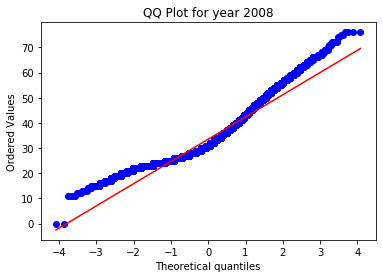

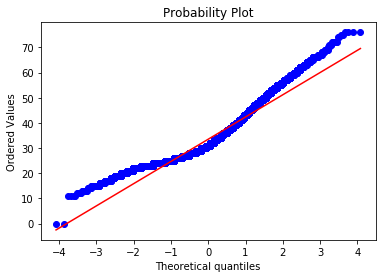

In [19]:
##QQ Plots##
fig = plt.figure()
ax = fig.add_subplot(111)
for label, data in plot_data.items():
    stats.probplot(data, dist="norm", plot=pylab)
    ax.set_title("QQ Plot for year {}".format(label))
    pylab.show()

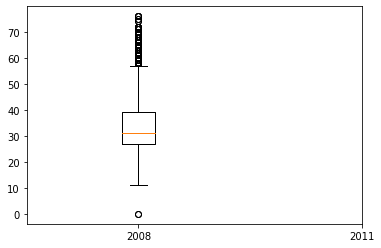

In [20]:
##Boxplots##
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

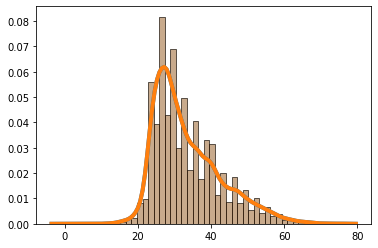

In [21]:
##Density Plots##
palette = itertools.cycle(sns.color_palette())
for data in plot_data.values():
    c = next(palette)
    sns.distplot(data, hist=True, kde=True, color = c, 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})

In [ ]:
f2007 = scrape_2007(f_urls[8])
f2007

In [ ]:
for row in parsed_rows:
    if len(row) > 12:
        print(row)

In [ ]:
f2007 = scrape_2009(f_urls[8])
f2007

In [ ]:
raw_rows